In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# annealed disorder

In [3]:
def eval_tmat_annealed(mu_a, mu_b, pa1 = 1, pa2 = 1, ea = 0, eb = 0, j_aa = 0, j_bb = 0, j_ab = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    T: considereing all the possible binding state combinations of the nucleosome to the left and the right
        , all the contributions to the binding state partition function
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """
    
    v1 = np.array([1, np.sqrt(pa1) * np.exp(mu_a / 2 - ea / 2), np.sqrt(pa1) * np.exp(mu_b / 2), np.sqrt(1 - pa1) * np.exp(mu_a / 2), np.sqrt(1 - pa1) * np.exp(mu_b / 2 - eb / 2)])
    v2 = np.array([1, np.sqrt(pa2) * np.exp(mu_a / 2 - ea / 2), np.sqrt(pa2) * np.exp(mu_b / 2), np.sqrt(1 - pa2) * np.exp(mu_a / 2), np.sqrt(1 - pa2) * np.exp(mu_b / 2 - eb / 2)])
    tmat = np.outer(v1, v2) * np.exp(f_ref)
    # T: tmat is all possible combinations of (un-normalized) probability of adjacent nucleosomes binding state (boltzmann weightings)
    #   essentially joint probability matrix
    
    # Add the interaction terms
    # T: all the matrix elements with a 0 have at max one protein bound, therefore no interaction
    # T: QUESTION: tmat[1,1]] means left nucleosome and right nucleosome have A bound. why assume interaction between them then?
    # ANSWER: tmat is bbetween two nucleosomes total: left-side and right-side. propogating from left-side to right-side
    tmat[1, 1] *= np.exp(-j_aa)
    tmat[1, 2] *= np.exp(-j_ab)
    tmat[1, 3] *= np.exp(-j_aa)
    tmat[1, 4] *= np.exp(-j_ab)
    tmat[2, 1] *= np.exp(-j_ab)
    tmat[2, 2] *= np.exp(-j_bb)
    tmat[2, 3] *= np.exp(-j_ab)
    tmat[2, 4] *= np.exp(-j_bb)
    tmat[3, 1] *= np.exp(-j_aa)
    tmat[3, 2] *= np.exp(-j_ab)
    tmat[3, 3] *= np.exp(-j_aa)
    tmat[3, 4] *= np.exp(-j_ab)
    tmat[4, 1] *= np.exp(-j_ab)
    tmat[4, 2] *= np.exp(-j_bb)
    tmat[4, 3] *= np.exp(-j_ab)
    tmat[4, 4] *= np.exp(-j_bb)
                    
    return tmat

def eval_tend_annealed(mu_a, mu_b, pa = 1, ea = 0, eb = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    T: only have one interaction if nucleosome is first or last genomic position
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """

    v1 = np.array([1, np.sqrt(pa) * np.exp(mu_a / 2 - ea / 2), np.sqrt(pa) * np.exp(mu_b / 2), np.sqrt(1 - pa) * np.exp(mu_a / 2), np.sqrt(1 - pa) * np.exp(mu_b / 2 - eb / 2)])    
    
    tend = v1 * np.exp(f_ref)
                    
    return tend

def eval_dtdmu_annealed(mu_a, mu_b, pa1 = 1, pa2 = 1, ea = 0, eb = 0, j_aa = 0, j_bb = 0, j_ab = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """

    
    v1 = np.array([1, np.sqrt(pa1) * np.exp(mu_a / 2 - ea / 2), np.sqrt(pa1) * np.exp(mu_b / 2), np.sqrt(1 - pa1) * np.exp(mu_a / 2), np.sqrt(1 - pa1) * np.exp(mu_b / 2 - eb / 2)])
    # change in transfer matrix as change mu_a, mu_b wrt left nucleosome
    dv1da = np.array([0, 0.5 * np.sqrt(pa1) * np.exp(mu_a / 2 - ea / 2), 0, 0.5 * np.sqrt(1 - pa1) * np.exp(mu_a / 2), 0])
    dv1db = np.array([0, 0, 0.5 * np.sqrt(pa1) * np.exp(mu_b / 2), 0, 0.5 * np.sqrt(1 - pa1) * np.exp(mu_b / 2 - eb / 2)])
    
    v2 = np.array([1, np.sqrt(pa2) * np.exp(mu_a / 2 - ea / 2), np.sqrt(pa2) * np.exp(mu_b / 2), np.sqrt(1 - pa2) * np.exp(mu_a / 2), np.sqrt(1 - pa2) * np.exp(mu_b / 2 - eb / 2)])
    dv2da = np.array([0, 0.5 * np.sqrt(pa2) * np.exp(mu_a / 2 - ea / 2), 0, 0.5 * np.sqrt(1 - pa2) * np.exp(mu_a / 2), 0])
    dv2db = np.array([0, 0, 0.5 * np.sqrt(pa2) * np.exp(mu_b / 2), 0, 0.5 * np.sqrt(1 - pa2) * np.exp(mu_b / 2 - eb / 2)])
    
    dtda1 = np.outer(dv1da, v2) * np.exp(f_ref)
    dtdb1 = np.outer(dv1db, v2) * np.exp(f_ref)
    dtda2 = np.outer(v1, dv2da) * np.exp(f_ref)
    dtdb2 = np.outer(v1, dv2db) * np.exp(f_ref)
    
    # Add the interaction terms
    
    dtda1[1, 1] *= np.exp(-j_aa)
    dtda1[1, 2] *= np.exp(-j_ab)
    dtda1[1, 3] *= np.exp(-j_aa)
    dtda1[1, 4] *= np.exp(-j_ab)
    dtda1[2, 1] *= np.exp(-j_ab)
    dtda1[2, 2] *= np.exp(-j_bb)
    dtda1[2, 3] *= np.exp(-j_ab)
    dtda1[2, 4] *= np.exp(-j_bb)
    dtda1[3, 1] *= np.exp(-j_aa)
    dtda1[3, 2] *= np.exp(-j_ab)
    dtda1[3, 3] *= np.exp(-j_aa)
    dtda1[3, 4] *= np.exp(-j_ab)
    dtda1[4, 1] *= np.exp(-j_ab)
    dtda1[4, 2] *= np.exp(-j_bb)
    dtda1[4, 3] *= np.exp(-j_ab)
    dtda1[4, 4] *= np.exp(-j_bb)
    
    dtdb1[1, 1] *= np.exp(-j_aa)
    dtdb1[1, 2] *= np.exp(-j_ab)
    dtdb1[1, 3] *= np.exp(-j_aa)
    dtdb1[1, 4] *= np.exp(-j_ab)
    dtdb1[2, 1] *= np.exp(-j_ab)
    dtdb1[2, 2] *= np.exp(-j_bb)
    dtdb1[2, 3] *= np.exp(-j_ab)
    dtdb1[2, 4] *= np.exp(-j_bb)
    dtdb1[3, 1] *= np.exp(-j_aa)
    dtdb1[3, 2] *= np.exp(-j_ab)
    dtdb1[3, 3] *= np.exp(-j_aa)
    dtdb1[3, 4] *= np.exp(-j_ab)
    dtdb1[4, 1] *= np.exp(-j_ab)
    dtdb1[4, 2] *= np.exp(-j_bb)
    dtdb1[4, 3] *= np.exp(-j_ab)
    dtdb1[4, 4] *= np.exp(-j_bb)
                    
    dtda2[1, 1] *= np.exp(-j_aa)
    dtda2[1, 2] *= np.exp(-j_ab)
    dtda2[1, 3] *= np.exp(-j_aa)
    dtda2[1, 4] *= np.exp(-j_ab)
    dtda2[2, 1] *= np.exp(-j_ab)
    dtda2[2, 2] *= np.exp(-j_bb)
    dtda2[2, 3] *= np.exp(-j_ab)
    dtda2[2, 4] *= np.exp(-j_bb)
    dtda2[3, 1] *= np.exp(-j_aa)
    dtda2[3, 2] *= np.exp(-j_ab)
    dtda2[3, 3] *= np.exp(-j_aa)
    dtda2[3, 4] *= np.exp(-j_ab)
    dtda2[4, 1] *= np.exp(-j_ab)
    dtda2[4, 2] *= np.exp(-j_bb)
    dtda2[4, 3] *= np.exp(-j_ab)
    dtda2[4, 4] *= np.exp(-j_bb)
    
    dtdb2[1, 1] *= np.exp(-j_aa)
    dtdb2[1, 2] *= np.exp(-j_ab)
    dtdb2[1, 3] *= np.exp(-j_aa)
    dtdb2[1, 4] *= np.exp(-j_ab)
    dtdb2[2, 1] *= np.exp(-j_ab)
    dtdb2[2, 2] *= np.exp(-j_bb)
    dtdb2[2, 3] *= np.exp(-j_ab)
    dtdb2[2, 4] *= np.exp(-j_bb)
    dtdb2[3, 1] *= np.exp(-j_aa)
    dtdb2[3, 2] *= np.exp(-j_ab)
    dtdb2[3, 3] *= np.exp(-j_aa)
    dtdb2[3, 4] *= np.exp(-j_ab)
    dtdb2[4, 1] *= np.exp(-j_ab)
    dtdb2[4, 2] *= np.exp(-j_bb)
    dtdb2[4, 3] *= np.exp(-j_ab)
    dtdb2[4, 4] *= np.exp(-j_bb)
        
    return dtda1, dtda2, dtdb1, dtdb2

# T: QUESTION: why calculate the change in the transfer matrix wrt chemcial potential as side-dependent?

def eval_dtenddmu_annealed(mu_a, mu_b, pa = 1, ea = 0, eb = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """

    
    dv1da = np.array([0, 0.5 * np.sqrt(pa) * np.exp(mu_a / 2 - ea / 2), 0, 0.5 * np.sqrt(1 - pa) * np.exp(mu_a / 2), 0])
    dv1db = np.array([0, 0, 0.5 * np.sqrt(pa) * np.exp(mu_b / 2), 0, 0.5 * np.sqrt(1 - pa) * np.exp(mu_b / 2 - eb / 2)])
    
    dtendda = dv1da * np.exp(f_ref)
    dtenddb = dv1db * np.exp(f_ref)
                    
    return dtendda, dtenddb


def eval_phi_annealed(pa_vec, mu_a = 0, mu_b = 0, ea = 0, eb = 0, j_aa = 0, j_bb = 0, j_ab = 0, f_ref = 0):
    
    nm = len(pa_vec)
    phiva = np.zeros((nm, 5))
    phivb = np.zeros((nm, 5))
    phia = np.zeros((nm))
    phib = np.zeros((nm))
    
    # Evaluate binding for the first bead
    
    pa2 = pa_vec[0]
    tend = eval_tend_annealed(mu_a, mu_b, pa2, ea, eb, f_ref)
    dtendda, dtenddb = eval_dtenddmu_annealed(mu_a, mu_b, pa2, ea, eb, f_ref)

    q_vec = tend
    phiva[0, :] = dtendda
    phivb[0, :] = dtenddb
    for j in range(1, nm):
        phiva[j, :] = tend
        phivb[j, :] = tend
    
    # Evaluate binding for the intermediate beads
    
    for i in range(0, nm - 1):

        # update mark probabilty of left and right nucleosome
        pa1 = pa2
        pa2 = pa_vec[i + 1]
        
        tmat = eval_tmat_annealed(mu_a, mu_b, pa1, pa2, ea, eb, j_aa, j_bb, j_ab, f_ref)
        dtda1, dtda2, dtdb1, dtdb2 = eval_dtdmu_annealed(mu_a, mu_b, pa1, pa2, ea, eb, j_aa, j_bb, j_ab, f_ref)
        
        q_vec = np.matmul(q_vec, tmat)

        for j in range(0, nm):
            if j == i:
                phiva[j, :] = np.matmul(phiva[j, :], tmat) + np.matmul(phiva[i + 1, :], dtda1)
                phivb[j, :] = np.matmul(phivb[j, :], tmat) + np.matmul(phivb[i + 1, :], dtdb1)
            elif j == (i + 1):
                # only condiser neighbor in one direction- whole point of transfer matrix method
                phiva[j, :] = np.matmul(phiva[j, :], dtda2)
                phivb[j, :] = np.matmul(phivb[j, :], dtdb2)
            else:
                phiva[j, :] = np.matmul(phiva[j, :], tmat)
                phivb[j, :] = np.matmul(phivb[j, :], tmat)
    
    # Evaluate binding for the last bead

    pa1 = pa2
    tend = eval_tend_annealed(mu_a, mu_b, pa1, ea, eb, f_ref)
    dtendda, dtenddb = eval_dtenddmu_annealed(mu_a, mu_b, pa1, ea, eb, f_ref)

    # calculate average binding fractions
    q = np.matmul(q_vec, tend) #part func
    phia[nm - 1] = (np.matmul(q_vec, dtendda) + np.matmul(phiva[nm - 1, :], tend)) / q
    phib[nm - 1] = (np.matmul(q_vec, dtenddb) + np.matmul(phivb[nm - 1, :], tend)) / q
    for j in range(0, nm - 1):
        phia[j] = np.matmul(phiva[j, :], tend) / q
        phib[j] = np.matmul(phivb[j, :], tend) / q
    
    return phia, phib
    

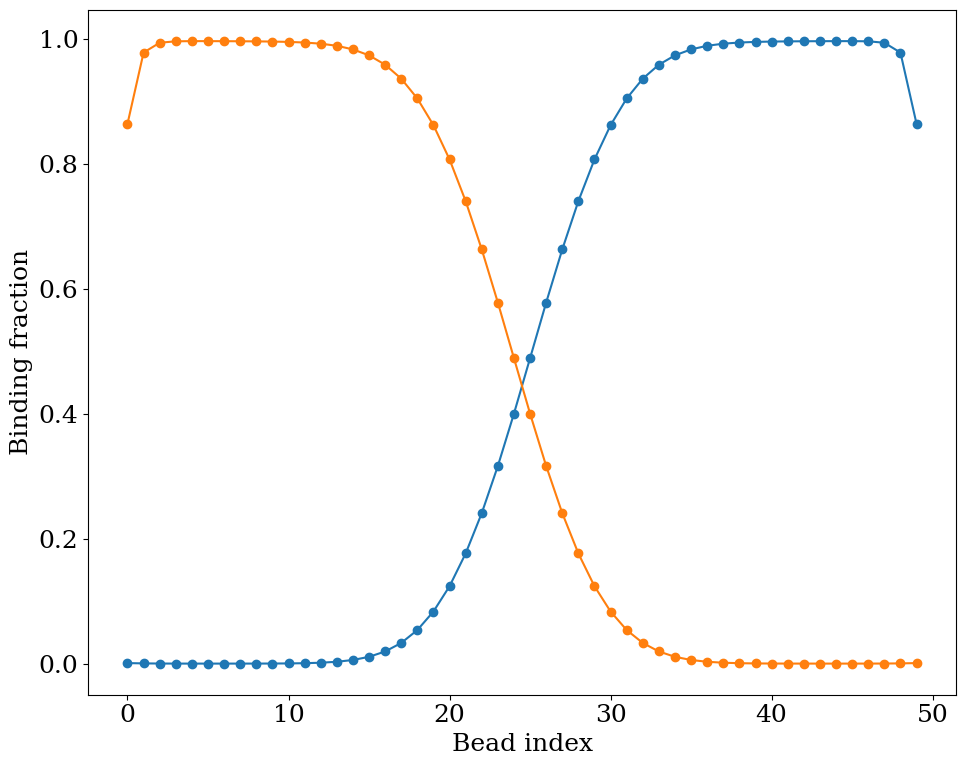

In [4]:
nm = 50

mu_a = -3.5
mu_b = -3.5
ea = -1.5
eb = -1.5
j_aa = -4
j_bb = -4
j_ab = 4

f_ref = np.min(np.array([j_aa, j_bb, j_ab, ea / 2, eb / 2]))

pa_vec = np.zeros((nm))

for i in range(nm):
    pa_vec[i] = i / (nm - 1)

phia, phib = eval_phi_annealed(pa_vec, mu_a, mu_b, ea, eb, j_aa, j_bb, j_ab, f_ref)
    
ea_chk = 0
eb_chk = eb
q_chk = 1 + np.exp(mu_a - ea_chk) + np.exp(mu_b - eb_chk)
phia_chk = np.exp(mu_a - ea_chk) / q_chk
phib_chk = np.exp(mu_b - eb_chk) / q_chk

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(phia,'o-')
plt.plot(phib,'o-')
# plt.plot(pa_vec,'-')
# plt.plot(np.array([0, nm - 1]), np.array([phia_chk, phia_chk]),'--')
# plt.plot(np.array([0, nm - 1]), np.array([phib_chk, phib_chk]),'--')

plt.xlabel(r'Bead index')
plt.ylabel(r'Binding fraction')
plt.tight_layout()
plt.show()

# single quenched calculation

In [6]:
def eval_tmat_quenched(mu_a, mu_b, ea1 = 0, ea2 = 0, eb1 = 0, eb2 = 0, j_aa = 0, j_bb = 0, j_ab = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """
    # boltzmann weightings of all possible binding states of the two nucleosommes. essentially all possible non-normalized joint probabilities
    tmat = np.zeros((3,3))
    for n1 in range(3):
        for n2 in range(3):
            if (n1 == 0 and n2 == 0):
                f_tot = 0.
            elif (n1 == 0 and n2 == 1):
                f_tot = 0.5 * (-mu_a + ea2)
            elif (n1 == 1 and n2 == 0):
                f_tot = 0.5 * (-mu_a + ea1)
            elif (n1 == 0 and n2 == 2):
                f_tot = 0.5 * (-mu_b + eb2)
            elif (n1 == 2 and n2 == 0):
                f_tot = 0.5 * (-mu_b + eb1)
            elif (n1 == 1 and n2 == 1):
                f_tot = 0.5 * (-2 * mu_a + ea1 + ea2) + j_aa
            elif (n1 == 1 and n2 == 2):
                f_tot = 0.5 * (-mu_a - mu_b + ea1 + eb2) + j_ab
            elif (n1 == 2 and n2 == 1):
                f_tot = 0.5 * (-mu_a - mu_b + ea2 + eb1) + j_ab
            elif (n1 == 2 and n2 == 2):
                f_tot = 0.5 * (-2 * mu_b + eb1 + eb2) + j_bb

            f_tot -= f_ref
            tmat[n1, n2] = np.exp(-f_tot)
                    
    return tmat

def eval_tend_quenched(mu_a, mu_b, ea = 0, eb = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """
    
    tend = np.zeros((3))
    tend[0] = 1
    
    f_tot = 0.5 * (-mu_a + ea)
    f_tot -= f_ref
    tend[1] = np.exp(-f_tot)

    f_tot = 0.5 * (-mu_b + eb)
    f_tot -= f_ref
    tend[2] = np.exp(-f_tot)
                    
    return tend

def eval_dtdmu_quenched(mu_a, mu_b, ea1 = 0, ea2 = 0, eb1 = 0, eb2 = 0, j_aa = 0, j_bb = 0, j_ab = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """
    
    dtda1 = np.zeros((3,3))
    dtda2 = np.zeros((3,3))
    dtdb1 = np.zeros((3,3))
    dtdb2 = np.zeros((3,3))
    for n1 in range(3):
        for n2 in range(3):
            if (n1 == 0 and n2 == 0):
                f_tot = 0.
                f_tot -= f_ref
            elif (n1 == 0 and n2 == 1):
                f_tot = 0.5 * (-mu_a + ea2)
                f_tot -= f_ref
                dtda2[n1, n2] = 0.5 * np.exp(-f_tot)
            elif (n1 == 1 and n2 == 0):
                f_tot = 0.5 * (-mu_a + ea1)
                f_tot -= f_ref
                dtda1[n1, n2] = 0.5 * np.exp(-f_tot)
            elif (n1 == 0 and n2 == 2):
                f_tot = 0.5 * (-mu_b + eb2)
                f_tot -= f_ref
                dtdb2[n1, n2] = 0.5 * np.exp(-f_tot)
            elif (n1 == 2 and n2 == 0):
                f_tot = 0.5 * (-mu_b + eb1)
                f_tot -= f_ref
                dtdb1[n1, n2] = 0.5 * np.exp(-f_tot)
            elif (n1 == 1 and n2 == 1):
                f_tot = 0.5 * (-2 * mu_a + ea1 + ea2) + j_aa
                f_tot -= f_ref
                dtda1[n1, n2] = 0.5 * np.exp(-f_tot)
                dtda2[n1, n2] = 0.5 * np.exp(-f_tot)
            elif (n1 == 1 and n2 == 2):
                f_tot = 0.5 * (-mu_a - mu_b + ea1 + eb2) + j_ab
                f_tot -= f_ref
                dtda1[n1, n2] = 0.5 * np.exp(-f_tot)
                dtdb2[n1, n2] = 0.5 * np.exp(-f_tot)
            elif (n1 == 2 and n2 == 1):
                f_tot = 0.5 * (-mu_a - mu_b + ea2 + eb1) + j_ab
                f_tot -= f_ref
                dtda2[n1, n2] = 0.5 * np.exp(-f_tot)
                dtdb1[n1, n2] = 0.5 * np.exp(-f_tot)
            elif (n1 == 2 and n2 == 2):
                f_tot = 0.5 * (-2 * mu_b + eb1 + eb2) + j_bb
                f_tot -= f_ref
                dtdb1[n1, n2] = 0.5 * np.exp(-f_tot)
                dtdb2[n1, n2] = 0.5 * np.exp(-f_tot)
        
    return dtda1, dtda2, dtdb1, dtdb2

def eval_dtenddmu_quenched(mu_a, mu_b, ea = 0, eb = 0, f_ref = 0):
    r"""
    eval_tmat - Evaluate the transfer matrix or the nucleosome
    
    Parameters
    ----------
    mu : float
        HP1 chemical potential
    nm1 : int
        Number of methylated tails in the left-side nucleosome
    nm2 : int
        Number of methylated tails in the right-side nucleosome
    nu : int
        Indicator for nucleosomes within the interaction length
    j_int : float
        Strength of the HP1 interactions
    
    Returns
    -------
    tmat : 3x3 float array
        Transfer matrix for the nucleosome    
    
    """
    
    dtendda = np.zeros((3))
    dtenddb = np.zeros((3))
    
    f_tot = 0.5 * (-mu_a + ea)
    f_tot -= f_ref
    dtendda[1] = 0.5 * np.exp(-f_tot)

    f_tot = 0.5 * (-mu_b + eb)
    f_tot -= f_ref
    dtenddb[2] = 0.5 * np.exp(-f_tot)
                    
    return dtendda, dtenddb

def eval_phi_quenched(sig, mu_a = 0, mu_b = 0, ea = 0, eb = 0, j_aa = 0, j_bb = 0, j_ab = 0, f_ref = 0):
    
    nm = len(sig)
    phiva = np.zeros((nm, 3))
    phivb = np.zeros((nm, 3))
    phia = np.zeros((nm))
    phib = np.zeros((nm))
    
    # Evaluate binding for the first bead
    # print("first bead binding:")
    ea2 = (1 - sig[0]) * ea
    eb2 = sig[0] * eb
    tend = eval_tend_quenched(mu_a, mu_b, ea2, eb2, f_ref)
    # print("tend: ", tend)
    dtendda, dtenddb = eval_dtenddmu_quenched(mu_a, mu_b, ea2, eb2, f_ref)
    # print("dtend/dmu_a :", dtendda)
    # print("dtend/dmu_b :", dtenddb)
    
    q_vec = tend
    # print("q_vec: ", q_vec)
    
    phiva[0, :] = dtendda
    phivb[0, :] = dtenddb
    for j in range(1, nm):
        phiva[j, :] = tend
        phivb[j, :] = tend

    # print("phiva: ", phiva)
    # print("phivb: ", phivb)
    
    # Evaluate binding for the intermediate beads
    # print("intermediate bead binding:")
    for i in range(0, nm - 1):
        # print(" --- nucleosome %s ---" % str(i+1))
        ea1 = ea2
        eb1 = eb2
        ea2 = (1 - sig[i + 1]) * ea
        eb2 = sig[i + 1] * eb
        
        tmat = eval_tmat_quenched(mu_a, mu_b, ea1, ea2, eb1, eb2, j_aa, j_bb, j_ab, f_ref)
        # print("tmat: ", tmat)
        dtda1, dtda2, dtdb1, dtdb2 = eval_dtdmu_quenched(mu_a, mu_b, ea1, ea2, eb1, eb2, j_aa, j_bb, j_ab, f_ref)
        
        # print("dt/dmu_a1: ", dtda1)
        # print("dt/dmu_a2: ", dtda2)
        # print("dt/dmu_b1: ", dtdb1)
        # print("dt/dmu_b2: ", dtdb2)
        
        q_vec = np.matmul(q_vec, tmat) # collecting all possibilites for eventual full partition function

        # print("updated q_vec (matmul q_vec and tmat): ", q_vec)
        
        # # print(q_vec)
        # print("old phiva: ", phiva)
        # print("old phivb: ", phivb)
        
        for j in range(0, nm):
            if j == i:
                phiva[j, :] = np.matmul(phiva[j, :], tmat) + np.matmul(phiva[i + 1, :], dtda1)
                phivb[j, :] = np.matmul(phivb[j, :], tmat) + np.matmul(phivb[i + 1, :], dtdb1)
            elif j == (i + 1):
                phiva[j, :] = np.matmul(phiva[j, :], dtda2)
                phivb[j, :] = np.matmul(phivb[j, :], dtdb2)
            else:
                phiva[j, :] = np.matmul(phiva[j, :], tmat)
                phivb[j, :] = np.matmul(phivb[j, :], tmat)

        # print("new phiva: ", phiva)
        # print("new phivb: ", phivb)
    
    # Evaluate binding for the last bead

    # print("last bead binding:")
    
    ea1 = ea2
    eb1 = eb2

    tend = eval_tend_quenched(mu_a, mu_b, ea1, eb1, f_ref)
    dtendda, dtenddb = eval_dtenddmu_quenched(mu_a, mu_b, ea1, eb1, f_ref)

    # print("tend: ", tend)
    # print("dtendda, dtendda: ", dtendda, dtendda)

    q = np.matmul(q_vec, tend)
    phia[nm - 1] = (np.matmul(q_vec, dtendda) + np.matmul(phiva[nm - 1, :], tend)) / q
    phib[nm - 1] = (np.matmul(q_vec, dtenddb) + np.matmul(phivb[nm - 1, :], tend)) / q
    for j in range(0, nm - 1):
        phia[j] = np.matmul(phiva[j, :], tend) / q
        phib[j] = np.matmul(phivb[j, :], tend) / q
    
    return phia, phib

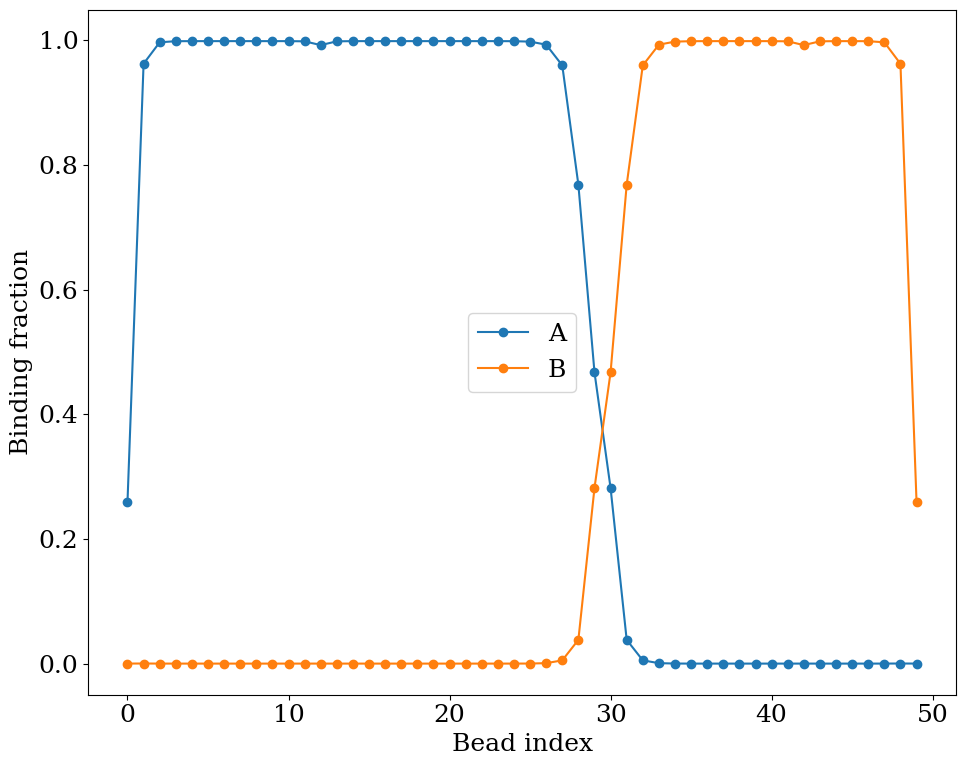

In [8]:
nm = 50

mu_a = -3
mu_b = -3
#orig
ea = -2
eb = -2

# ea = 2
# eb = 2
j_aa = -4
j_bb = -4
j_ab = 4

f_ref = np.min(np.array([j_aa, j_bb, j_ab, ea, eb]))

ntot = 1

sig = np.zeros((nm))
phia_ave = np.zeros((nm))
phib_ave = np.zeros((nm))

for j in range(ntot):
    for i in range(nm):
        pb = i / (nm - 1)    
        if np.random.uniform() < pb:
            sig[i] = 1
        else:
            sig[i] = 0

    phia, phib = eval_phi_quenched(sig, mu_a, mu_b, ea, eb, j_aa, j_bb, j_ab, f_ref)
    phia_ave += phia / ntot
    phib_ave += phib / ntot
    
ea_chk = 0
eb_chk = eb
q_chk = 1 + np.exp(mu_a - ea_chk) + np.exp(mu_b - eb_chk)
phia_chk = np.exp(mu_a - ea_chk) / q_chk
phib_chk = np.exp(mu_b - eb_chk) / q_chk

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(phia_ave,'o-', label = "A")
plt.plot(phib_ave,'o-', label = "B")

# plt.plot(sig)
# plt.plot(np.array([0, nm - 1]), np.array([phia_chk, phia_chk]),'--')
# plt.plot(np.array([0, nm - 1]), np.array([phib_chk, phib_chk]),'--')

plt.xlabel(r'Bead index')
plt.ylabel(r'Binding fraction')
plt.tight_layout()
plt.legend()
plt.show()

# comparison

In [56]:
nm = 50

mu_a = -3
mu_b = -3
#orig
ea = -2
eb = -2

# ea = 2
# eb = 2
j_aa = -4
j_bb = -4
j_ab = 4

f_ref = np.min(np.array([j_aa, j_bb, j_ab, ea, eb]))


#quenched

ntot = 100

sig = np.zeros((nm))
phia_sing = np.zeros((nm))
phib_sing = np.zeros((nm))

phia_all = np.zeros((ntot, nm))
phib_all = np.zeros((ntot, nm))

phia_qave = np.zeros((nm))
phib_qave = np.zeros((nm))

for j in range(ntot):
    for i in range(nm):
        pa = i / (nm - 1)    
        if np.random.uniform() < pa:
            sig[i] = 0
        else:
            sig[i] = 1

    phia, phib = eval_phi_quenched(sig, mu_a, mu_b, ea, eb, j_aa, j_bb, j_ab, f_ref)
    if j == 0:
        phia_sing += phia #/ ntot
        phib_sing += phib #/ ntot

    phia_qave += phia/ntot
    phib_qave += phib/ntot
    
    phia_all[j,:] = phia
    phib_all[j,:] = phib


# annealed

pa_vec = np.zeros((nm))

for i in range(nm):
    pa_vec[i] = i / (nm - 1)
phia_ann, phib_ann = eval_phi_annealed(pa_vec, mu_a, mu_b, ea, eb, j_aa, j_bb, j_ab, f_ref)
    
    
# ea_chk = 0
# eb_chk = eb
# q_chk = 1 + np.exp(mu_a - ea_chk) + np.exp(mu_b - eb_chk)
# phia_chk = np.exp(mu_a - ea_chk) / q_chk
# phib_chk = np.exp(mu_b - eb_chk) / q_chk


In [57]:
pa_vec

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

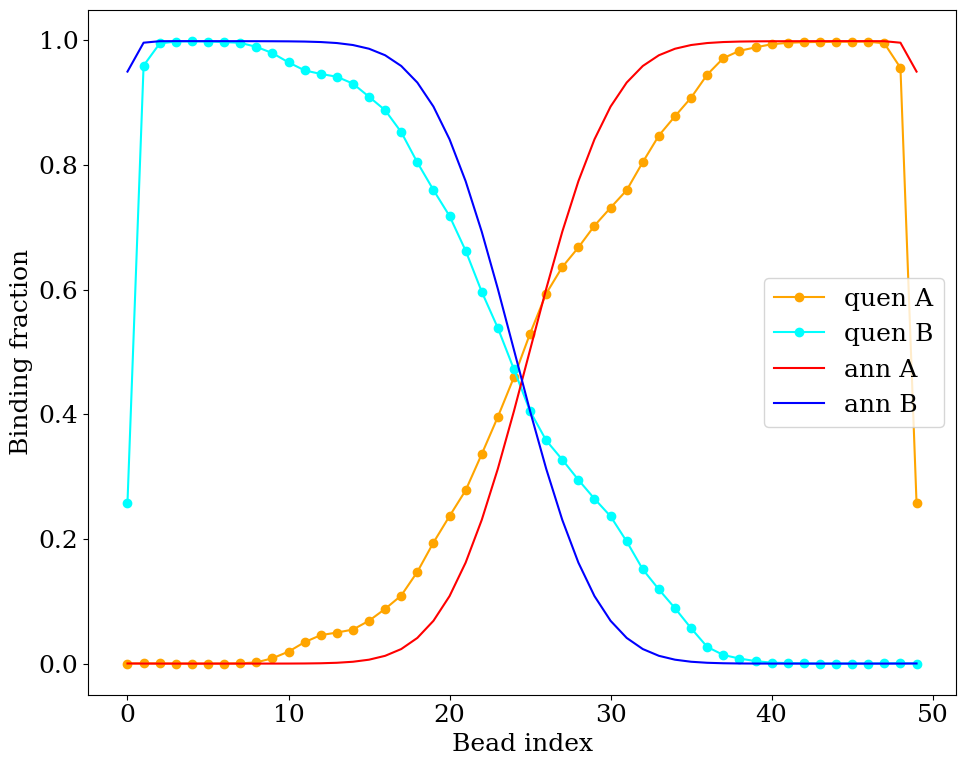

In [60]:

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(phia_qave,'o-', label = "quen A", color = "orange")
plt.plot(phib_qave,'o-', label = "quen B", color = "cyan")
plt.plot(phia_ann,'-', label = "ann A", color = "red")
plt.plot(phib_ann,'-', label = "ann B", color = "blue")

# plt.plot(sig)
# plt.plot(np.array([0, nm - 1]), np.array([phia_chk, phia_chk]),'--')
# plt.plot(np.array([0, nm - 1]), np.array([phib_chk, phib_chk]),'--')

plt.xlabel(r'Bead index')
plt.ylabel(r'Binding fraction')
plt.tight_layout()
plt.legend()
plt.show()

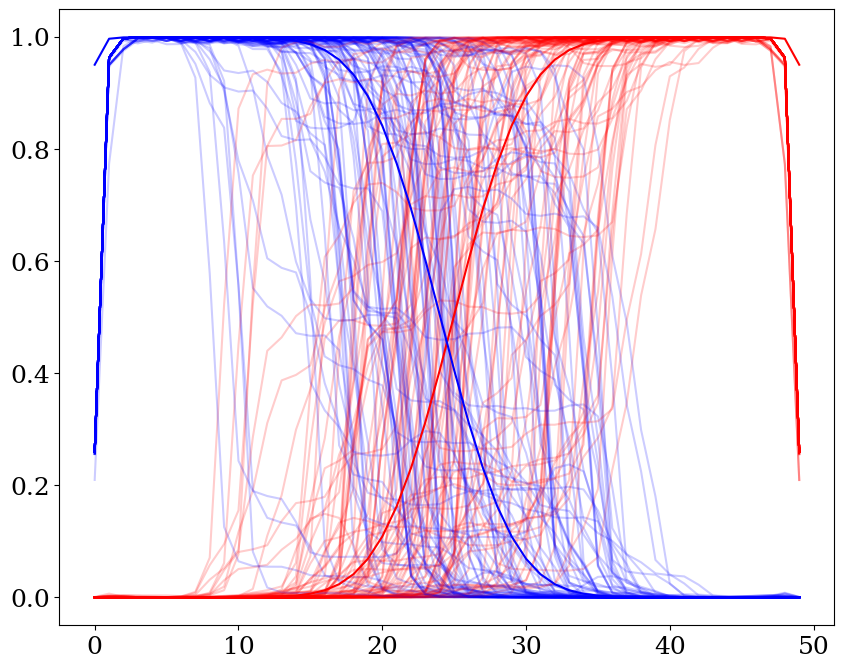

In [62]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i in range(ntot):
    plt.plot(phia_all[i,:],'-', label = "A", color = "red", alpha = 0.2)
    plt.plot(phib_all[i,:],'-', label = "B", color = "blue", alpha = 0.2)  

plt.plot(phia_ann,'-', label = "ann A", color = "red")
plt.plot(phib_ann,'-', label = "ann B", color = "blue")

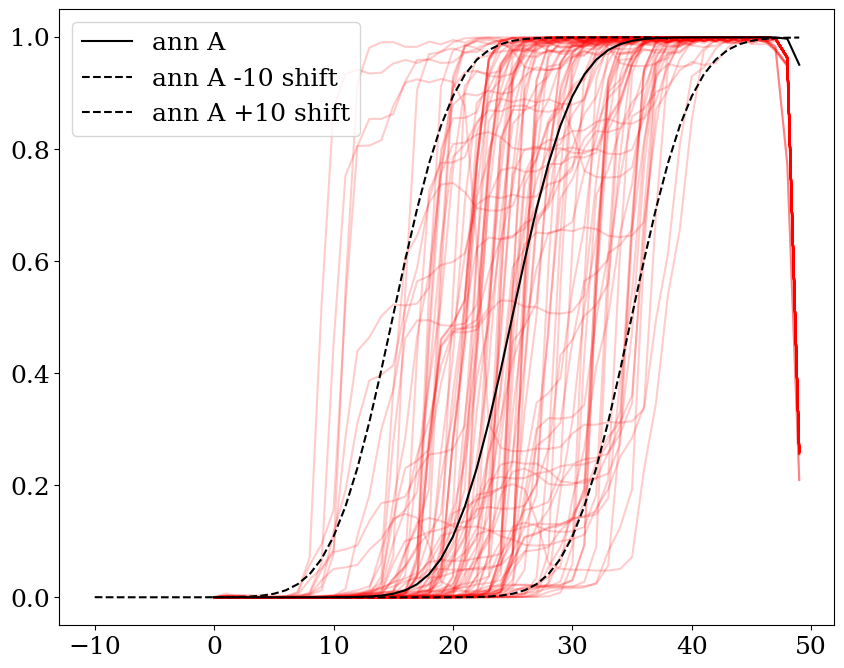

In [82]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i in range(ntot):
    plt.plot(phia_all[i,:],'-', color = "red", alpha = 0.2)
    # plt.plot(phib_all[i,:],'-', label = "B", color = "blue", alpha = 0.2)  

plt.plot(phia_ann,'-', label = "ann A", color = "black")
plt.plot(np.arange(0,nm-10)+10,phia_ann[0:40],'--', label = "ann A -10 shift", color = "black")
plt.plot(np.arange(0,nm-1)-10,phia_ann[0:49],'--', label = "ann A +10 shift", color = "black")


# plt.plot(phib_ann,'-', label = "ann B", color = "blue")
plt.legend()

In [ ]:
# one option